<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch6. 4~6

pg. 396-408

# [Chapter 6]

## 6-4. SVD(Singular Value Decomposition)

### SVD 개요

SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능 (PCA의 경우 정방행렬만 가능)

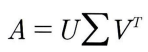


- SVD는 특이값 분해로 불림
- 행렬 U, V에 속한 벡터는 특이벡터(singular vector)
  - 모든 특이벡터는 서로 직교하는 성질을 가짐
- Σ : 대각행렬
  - Σ에서 0이 아닌 값이 행렬 A의 특이값


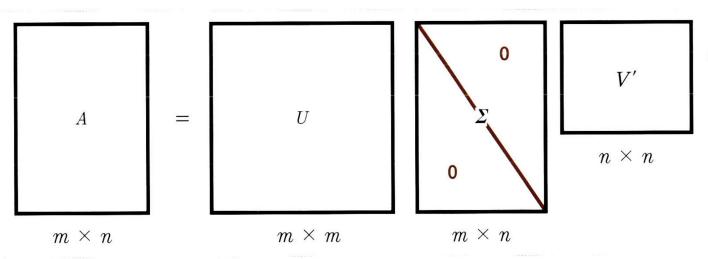

- A : mXn / U : mxm / Σ : mxn / V<sup>T</sup> : nxn

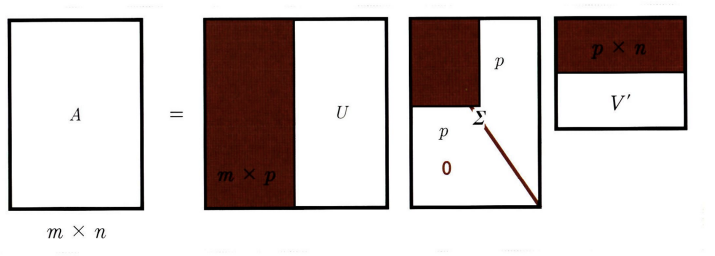

Truncated SVD
- Σ의 대각원소 중에서 상위 몇 개만 추출, 이에 대응하는 U, V의 원소도 함께 제거에 더욱 차원을 줄인 형태로 분해하는 것
- Σ의 비대각 부분과 대각 원소 중에 특이값이 0인 부분 모두 제거, 제거된 Σ에 대응되는 U와 V 원소도 함께 제거

numpy.linalg.svd
- 넘파이의 SVD 모듈

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


numpy.linalg.svd
- 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬 반환
- Σ 행렬의 경우 대각행렬을 제외하면 모두 0이므로 0이 아닌 값만 1차원 행렬로 표현

In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- U, Sigma, Vt를 내적하면 원본행렬로 복원 가능
- 유의점 : Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 0을 포함한 대칭행렬로 변환한 뒤에 내적 수행해야 함

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 의존성 부여하기 위해 a 행렬의 3번째 행을 '첫번째 행 + 두번째 행'으로 업데이트
- 4번째 행은 첫번째 로우와 같다고 업데이트

In [ ]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- 로우 간 관계가 높아지자 Sigma 값 중 2개가 0으로 바뀜
  - 선형 독립인 로우 벡터의 개수가 2개라는 의미(rank=2)

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigam, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma 값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

- Truncated SVD를 이용하여 행렬 분해
  - Σ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
  - 원본 행렬로 정확히 복원 불가
  - but 상당한 수준으로 원본 행렬 근사 가능
- Truncated SVD는 사이파이에서만 지원됨

- Truncated SVD로 분해된 행렬을 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있음

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD는 사이파이의 svds처럼 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지 않음
- PCA 클래스와 유사하게 fit(), transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

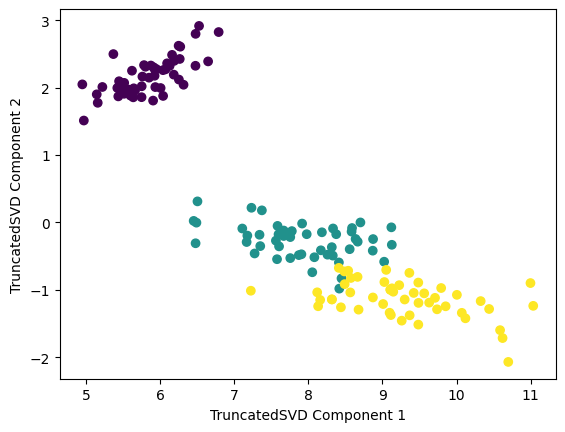

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD 변환은 PCA와 유사하게 변환 후에 품종별 클러스터링이 어느 정도 가능할 정도로 뛰어난 고유성을 가짐

Text(0.5, 1.0, 'PCA Transformed')

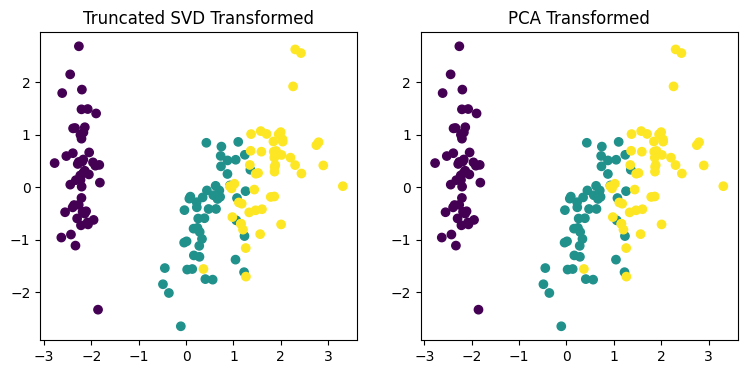

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 데이터를 스케일링 후 TruncatedSVD와 PCA 클래스 변환을 해보면 거의 동일한 결과를 보임

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3352789609483912e-15
6.938893903907228e-18


- 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 서로 비교해보면 거의 같음
- 스케일링을 통해 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환 수행
  
  -> PCA가 SVD 알고리즘으로 구현됐음
- PCA는 밀집 행렬에 대한 변환만 가능
- SVD는 희소 행렬에 대한 변환도 가눙

SVD
- 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식, 신호 처리 분야에 사용
- LSA(Latent Semantic Analysis)의 기반 알고리즘

## 6-5. NMF(Non-Negative Matrix Factorization)


### NMF 개요
낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 간단한 두 개의 기반 양수 행렬로 분해됨

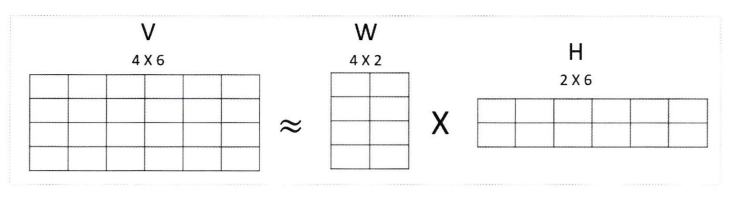

- 이렇게 분해된 행렬은 잠재 요소를 특성으로 가짐
- W : 원본 행에 대해 잠재 요소의 값이 얼마나 되는지에 대응
- H : 잠재 요소가 원본 열로 어떻게 구성됐는지 나타냄

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

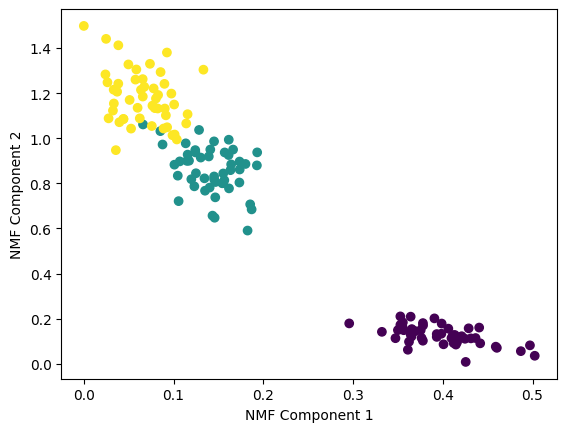

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF
- 이미지 압축을 통한 패턴 인식
- 텍스트의 토픽 모델링
- 문서 유사도 및 클러스팅
- 추천 영역(ex. 영화 추천)
  - 잠재 요소(Latent Factoring) 기반의 추천 방식
  - 사용자가 평가하지 않은 상춤에 대한 잠재적인 요소를 추출해 평가 순위를 예측하고, 높은 순위로 예측된 상품을 추천

## 6-6. 정리

- PCA : 입력 데이터의 *변동성*이 가장 큰 축을 구하고, 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤, 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식
  - 고유 벡터(Eigenvector) : 입력 데이터의 공분산 행렬을 기반으로 생성
  - 고유 벡터에 입력 데이터를 선형 변환하는 방식
  
- LDA(Lineaer Discriminant Analysis)
  - PCA와 매우 유사한 방식
  - 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원 축소 (<-> PCA는 변동성이 가장 큰 축을 찾음)

- SVD / NMF
  - 고차원 행렬을 두 개의 저차원 행렬로 분리하는 **행렬 분해 기법**
  - 원본 행렬에서 잠재된 요소를 추출
  - 토픽 모델링, 추천 시스템에서 활발하게 사용됨